# Important Data

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [33]:
path = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project\Data'

In [34]:
# Read the CSV file
df = pd.read_csv(os.path.join(path, "Original", 'Dataset-weather-prediction-dataset-processed.csv'))
df_ans= pd.read_csv(os.path.join(path, "Original", 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df_cleaned=pd.read_csv(os.path.join(path, 'Prepared', 'df_cleaned.csv' ))

In [36]:

df_cleaned.drop(columns=['Unnamed: 0'])

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_global_radiation  \
0                  6.5             0.8  ...                       0.45   
1                  6.1             3.3  ...                       0.25   
2                  8.5             5.1  ...                       0.17   
3                  6.3             3.8  ...                       0.13   
4                  3.0            -0.7  ...                       0.46   
...                ...             ...  ...                        ...   
22945             15.9            11.4  ...                       1.13   
22946             16.7            14.3  ...                       1.13   
22947             16.7            13.1  ...                       1.13   
22948             15.4            11.6  ...                       1.13   
22949             13.5             9.9  ...                       1.13   

       VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                        0.34                4.7                 8.5   
1                        0.84                0.7                 8.9   
2                        0.08                0.1                10.5   
3                        0.98                0.0                 7.4   
4                        0.00                5.7                 5.7   
...                       ...                ...                 ...   
22945                    0.41                3.4                10.7   
22946                    0.41                3.4                10.7   
22947                    0.41                3.4                10.7   
22948                    0.41                3.4                10.7   
22949                    0.41                3.4                10.7   

       VALENTIA_temp_min  VALENTIA_temp_max  Year  KASSEL_cloud_cover  \
0                    6.0               10.9  1960                   8   
1                    5.6               12.1  1960                   6   
2                    8.1               12.9  1960                   8   
3                    7.3               10.6  1960                   6   
4                    3.0                8.4  1960                   7   
...                  ...                ...   ...    

# Wrangle
cut down to 10 years

In [35]:
# Extract stations list

stations = [col.split('_')[0] for col in df_cleaned.columns if '_' in col]

# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [37]:
# Ensure the DATE column is in string format, if it's not already
df_cleaned['DATE'] = df_cleaned['DATE'].astype(str)

# Extract the year part from the DATE column
df_cleaned['Year'] = df_cleaned['DATE'].str[:4].astype(int)

# Filter for the years between 1980 and 1989
df_filtered = df_cleaned[(df_cleaned['Year'] >= 1980) & (df_cleaned['Year'] <= 1989)]

# Drop the 'Year' column if you don't need it
df_filtered = df_filtered.drop(columns=['Year'])

In [38]:
# Ensure the DATE column is in string format, if it's not already
df_ans['DATE'] = df_ans['DATE'].astype(str)

# Extract the year part from the DATE column
df_ans['Year'] = df_ans['DATE'].str[:4].astype(int)

# Filter for the years between 1980 and 1989
df_ans_filtered = df_ans[(df_ans['Year'] >= 1980) & (df_ans['Year'] <= 1989)]

# Drop the 'Year' column if you don't need it
df_ans_filtered = df_ans_filtered.drop(columns=['Year'])

In [39]:
# Drop the specified columns from df_ans_filtered and df_filtered
df_ans_filtered = df_ans_filtered.drop(columns=['DATE'])
df_filtered = df_filtered.drop(columns=['Unnamed: 0', 'DATE', 'MONTH'])

In [40]:
df_ans_filtered.head(10)

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
7305                       0                          0   
7306                       0                          0   
7307                       0                          0   
7308                       0                          0   
7309                       0                          0   
7310                       0                          0   
7311                       0                          0   
7312                       0                          0   
7313                       0                          0   
7314                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
7305                          0                        0   
7306                          0                        0   
7307                          0                        0   
7308                          0                        0   
7309                          0                        0   
7310                          0                        0   
7311                          0                        0   
7312                          0                        0   
7313                          0                        0   
7314                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
7305                            0                          0   
7306                            0                          0   
7307                            0                          0   
7308                            0                          0   
7309                            0                          0   
7310                            0                          0   
7311                            0                          0   
7312                            0                          0   
7313                            0                          0   
7314                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
7305                        0                           0   
7306                        0                           0   
7307                        0                           0   
7308                        0                           0   
7309                        0                           0   
7310                        0                           0   
7311                        0                           0   
7312                        0                           0   
7313                        0                           0   
7314                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
7305                            0                        0   
7306                            0                        0   
7307                            0                        0   
7308                            0                        0   
7309                            0                        0   
7310                            0                        0   
7311                            0                        0   
7312                            0                        0   
7313                            0                        0   
7314                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
7305                          0                      0   
7306                          0                      0   
7307                          0                      0   
7308                          0                      0   
7309                          0                      0   
7310                          0                      0   
7311                          0                      0   
7312                          0                      0   
7313                          0                      0   
7314                          0                      0 

In [41]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_filtered
y = df_ans_filtered

In [42]:
X.shape

(3653, 135)

In [43]:
y.shape

(3653, 15)

# Split

In [44]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [45]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


In [46]:
# Example of downsampling
#X_train_small = X_train[:10000]  # Use only the first 10,000 samples for training
#y_train_small = y_train[:10000]

# Grid Search

In [47]:
# creating a RF classifier
clf = RandomForestClassifier()

In [48]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              #'max_features':[1,3,5,7],
              #'min_samples_leaf':[1,2,3],
              #'min_samples_split':[1,2,3]
           }

In [49]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Search took 1.0654667337735495 minutes


In [50]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'n_estimators': 200}
Best GRID search score is: 0.5739219712525667


# Random Search

In [51]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [52]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [54]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 21.545399924119312 minutes


In [55]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 410}
Best RANDOM search score is: 0.542778918548939


In [56]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'n_estimators': 200}
Best GRID search score is: 0.5739219712525667
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 410}
Best RANDOM search score is: 0.542778918548939


# Random Tree Forest

In [58]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None)#, max_features=2, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [64]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)

  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6101231190150479


In [65]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (731, 15)
y_pred shape: (731, 15)


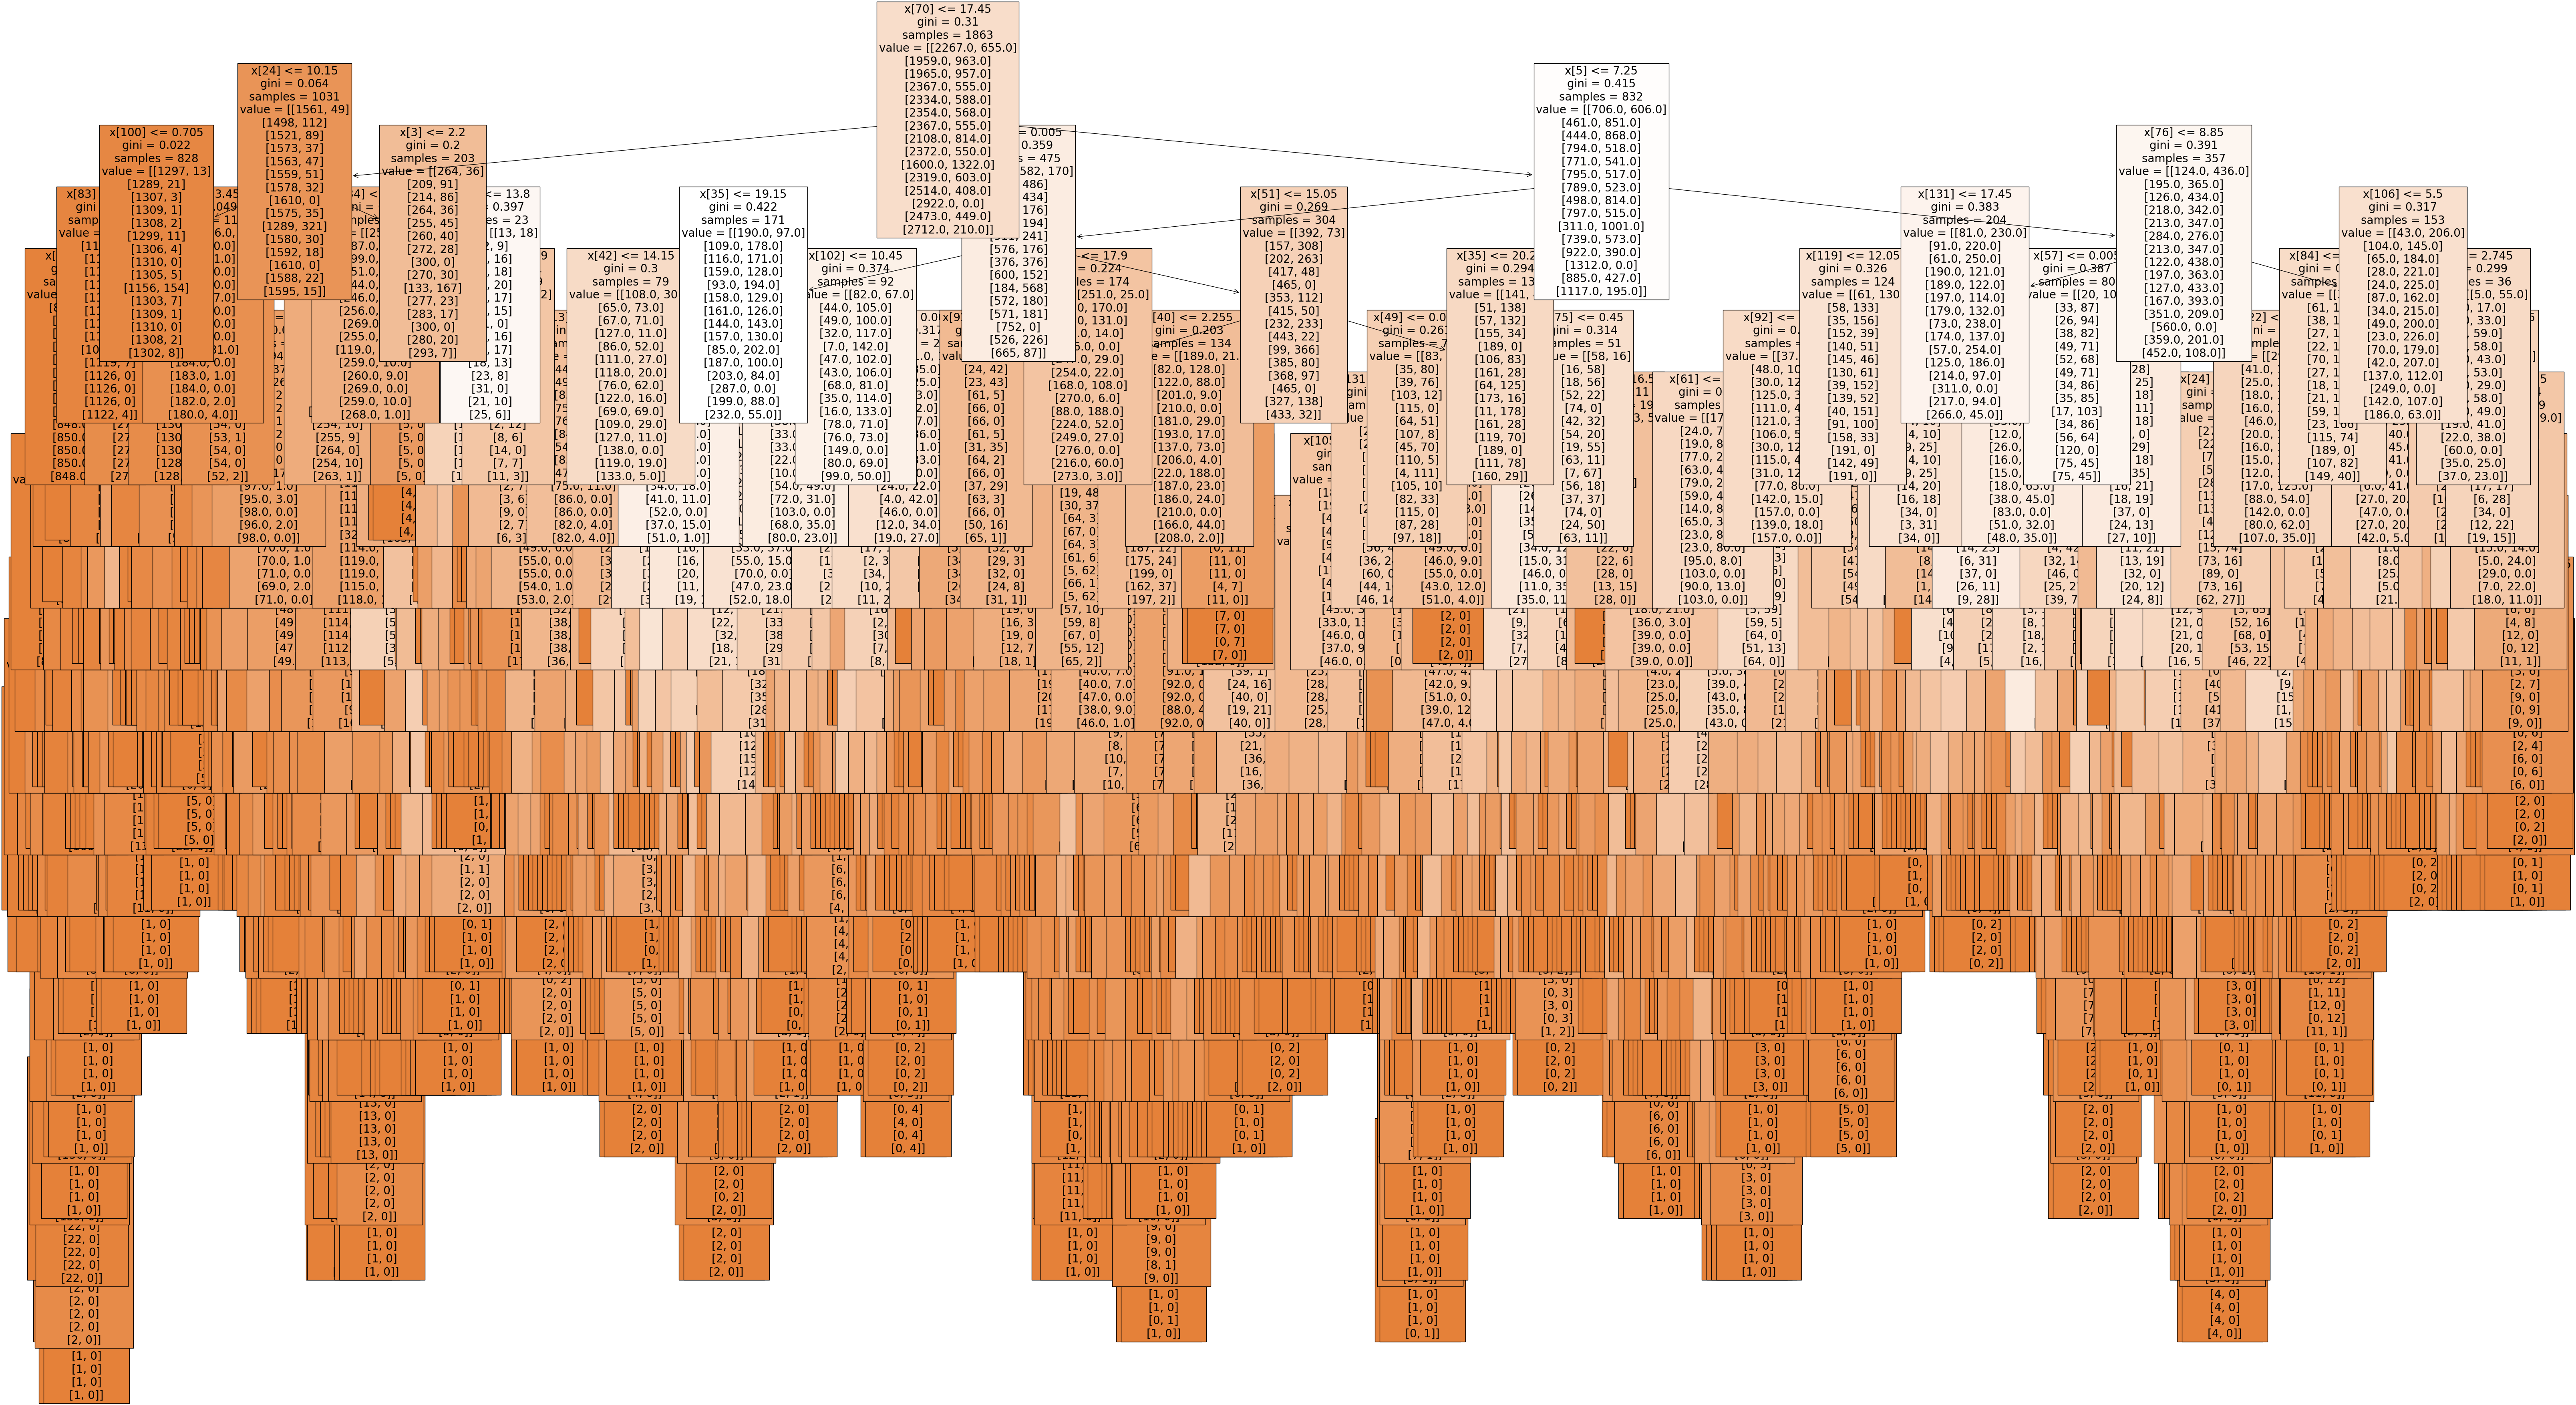

In [67]:
types = {0:'Pleasant Weather', 1:'Bad Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[5], fontsize = 20, class_names=types, filled=True);

In [68]:
path2 = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project'

In [69]:
fig.savefig(os.path.join(path2, 'Visual Assets', 'Optimized_random_forest_1980s.png'),bbox_inches='tight')

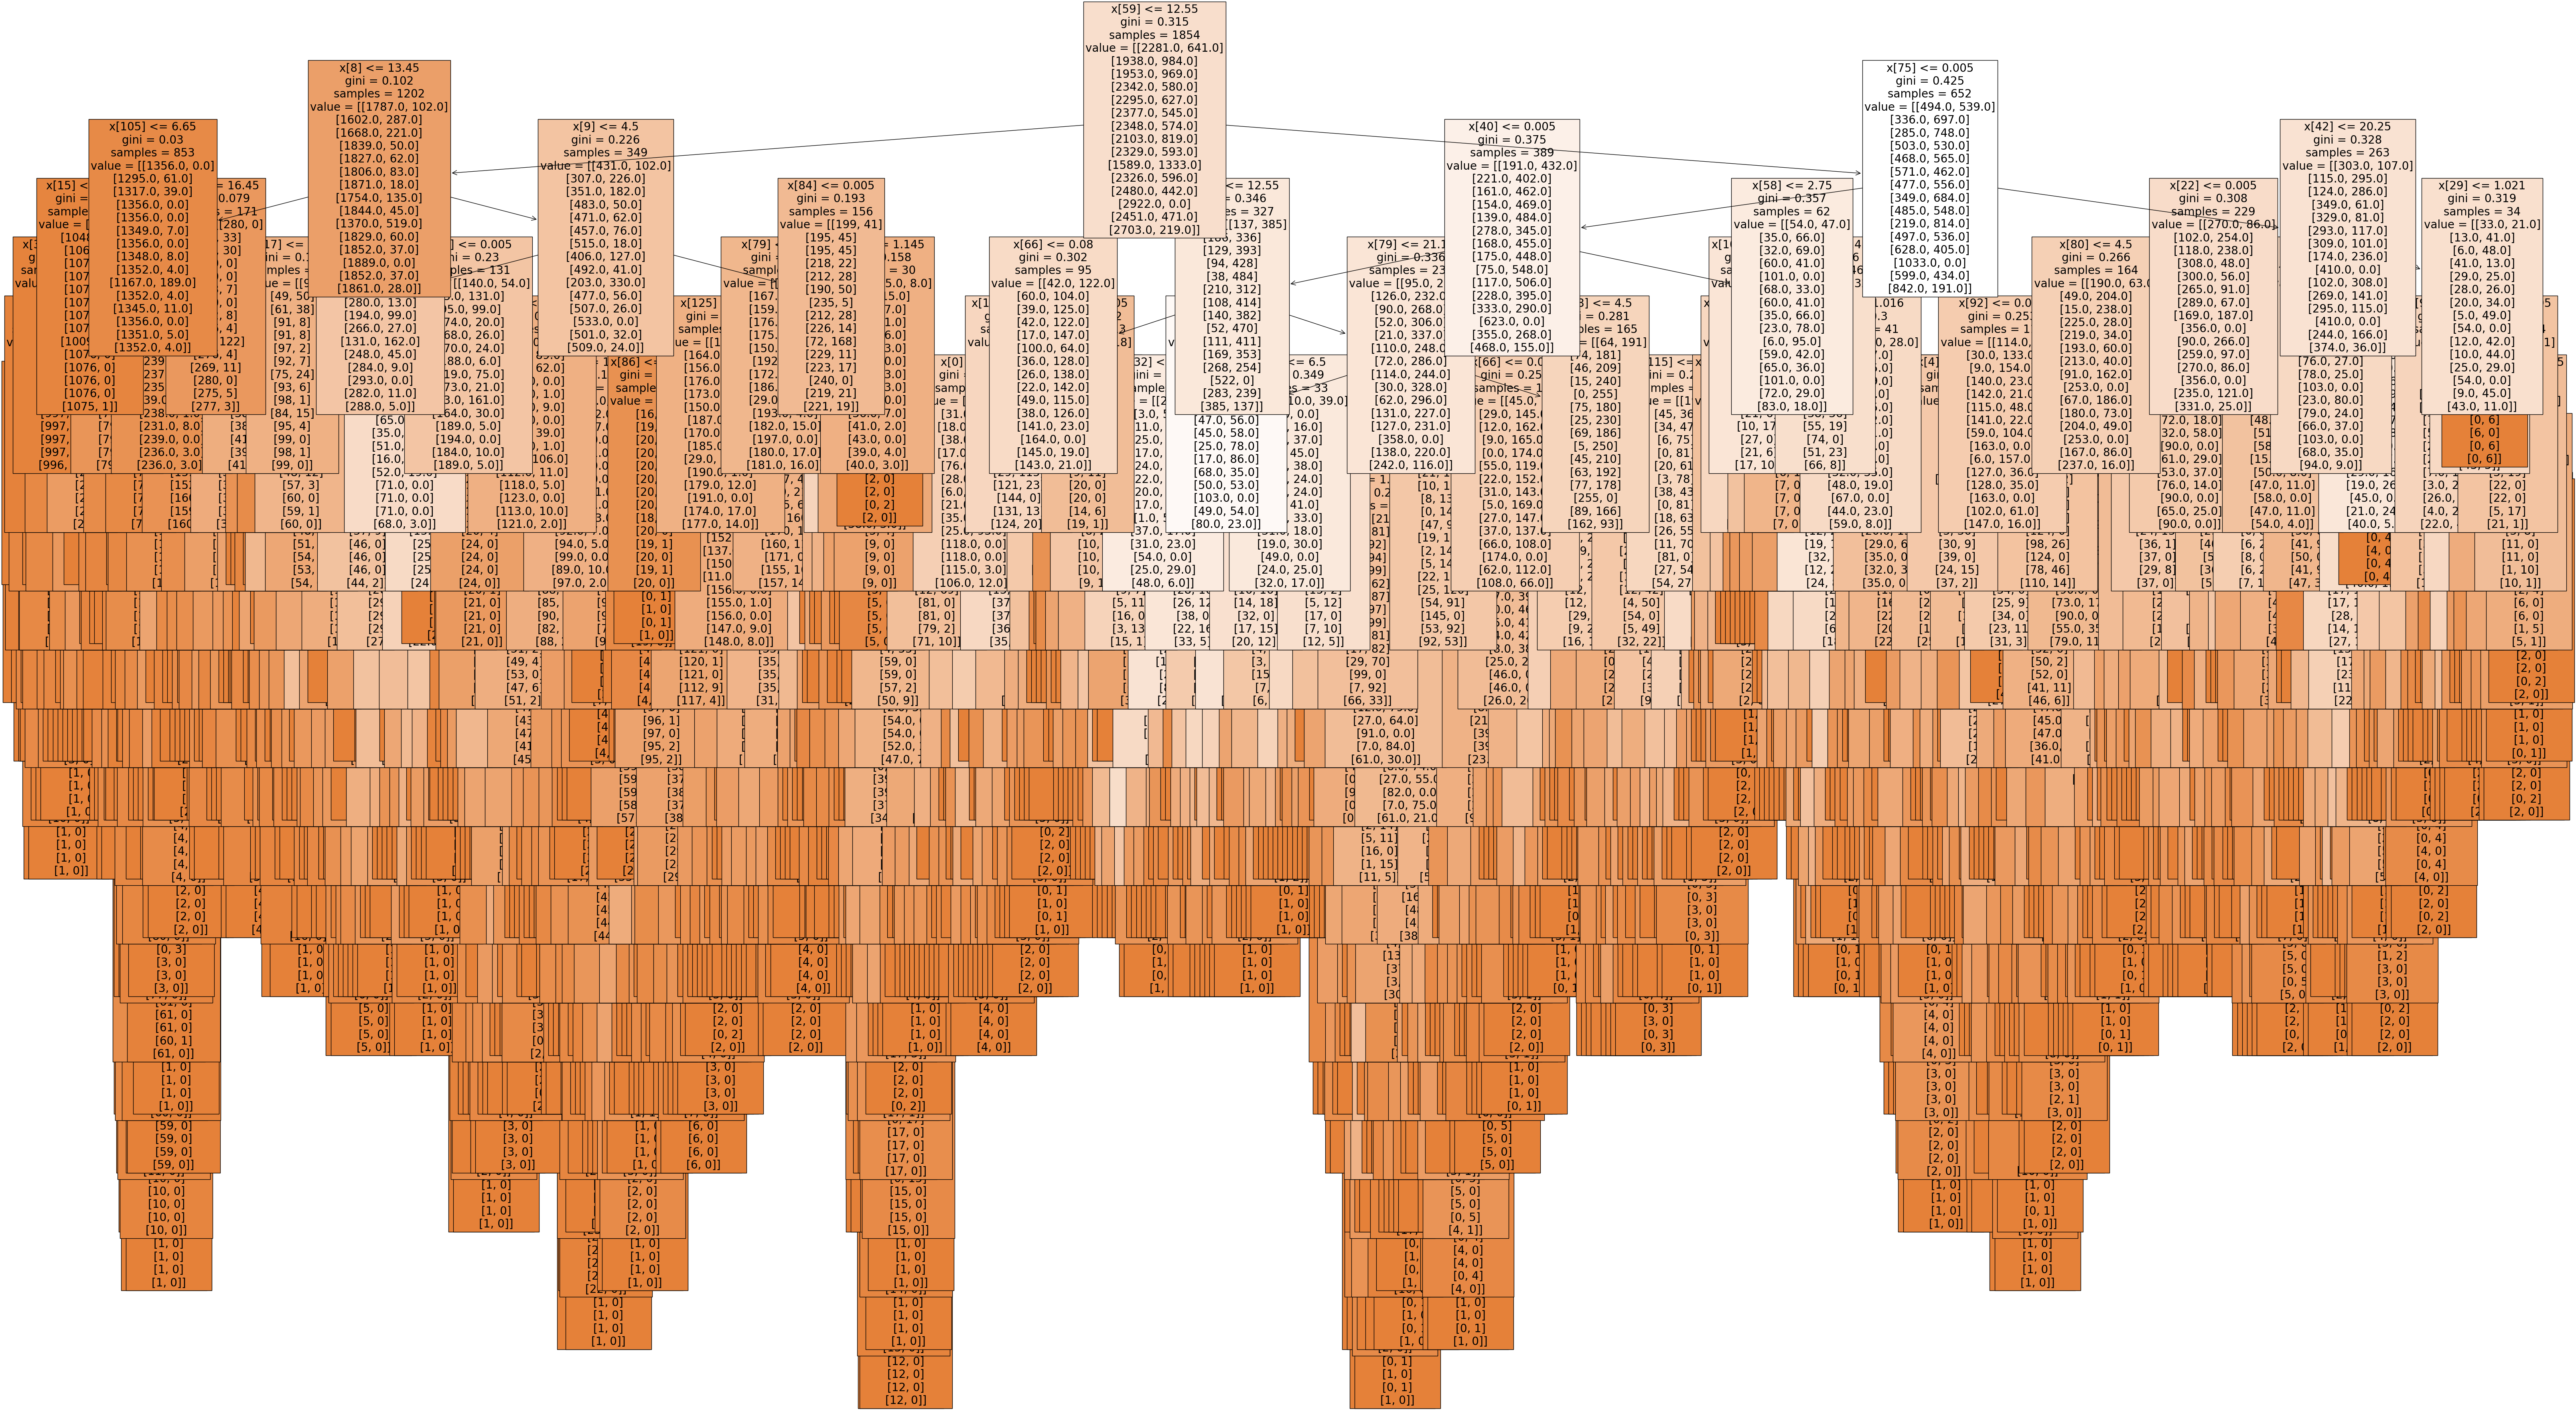

In [70]:
types = {0:'Pleasant Weather', 1:'Bad Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[10], fontsize = 20, class_names=types, filled=True);

In [71]:
fig.savefig(os.path.join(path2, 'Visual Assets', 'Optimized_random_forest_1980s_V2.png'),bbox_inches='tight')

# Finding Variable Importance  

In [73]:
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([0.00299486, 0.00278348, 0.00279051, 0.00440858, 0.01365198,
       0.00646032, 0.01479304, 0.00302255, 0.03415803, 0.00343951,
       0.0033978 , 0.00334138, 0.00434622, 0.01475045, 0.00462129,
       0.00646441, 0.00374887, 0.01003642, 0.00316228, 0.00309078,
       0.00291694, 0.00367363, 0.01278907, 0.00433216, 0.01021711,
       0.00576331, 0.01432224, 0.00267727, 0.00296183, 0.0054011 ,
       0.0055018 , 0.01441955, 0.00461774, 0.02034123, 0.00275791,
       0.0420008 , 0.00472356, 0.00295544, 0.00429061, 0.00364189,
       0.01867709, 0.00653239, 0.01748281, 0.00375929, 0.03819693,
       0.00226642, 0.0033427 , 0.00407789, 0.00376517, 0.00713662,
       0.00392113, 0.0171465 , 0.00278924, 0.01891646, 0.00308092,
       0.00467008, 0.00366924, 0.01178724, 0.00482941, 0.0229571 ,
       0.00395902, 0.0264851 , 0.00219044, 0.00325734, 0.00322811,
       0.003448  , 0.01471089, 0.00369187, 0.01330189, 0.00323678,
       0.01583594, 0.00624629, 0.00359013, 0.00401669, 0.00464

In [74]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00299486, 0.00278348, 0.00279051, 0.00440858, 0.01365198,
         0.00646032, 0.01479304, 0.00302255, 0.03415803],
        [0.00343951, 0.0033978 , 0.00334138, 0.00434622, 0.01475045,
         0.00462129, 0.00646441, 0.00374887, 0.01003642],
        [0.00316228, 0.00309078, 0.00291694, 0.00367363, 0.01278907,
         0.00433216, 0.01021711, 0.00576331, 0.01432224],
        [0.00267727, 0.00296183, 0.0054011 , 0.0055018 , 0.01441955,
         0.00461774, 0.02034123, 0.00275791, 0.0420008 ],
        [0.00472356, 0.00295544, 0.00429061, 0.00364189, 0.01867709,
         0.00653239, 0.01748281, 0.00375929, 0.03819693],
        [0.00226642, 0.0033427 , 0.00407789, 0.00376517, 0.00713662,
         0.00392113, 0.0171465 , 0.00278924, 0.01891646],
        [0.00308092, 0.00467008, 0.00366924, 0.01178724, 0.00482941,
         0.0229571 , 0.00395902, 0.0264851 , 0.00219044],
        [0.00325734, 0.00322811, 0.003448  , 0.01471089, 0.00369187,
         0.01330189, 0.00323678, 0.0158359

In [75]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08506336, 0.05414635, 0.06026753, 0.10067923, 0.10026001,
       0.06336213, 0.08362854, 0.06695712, 0.09502719, 0.07083557,
       0.06132785, 0.05446453, 0.02915571, 0.04062771, 0.03419717])

In [76]:
all_stations = set([col.split('_')[0] for col in X.columns if '_' in col])
all_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [77]:
import pandas as pd
# Ensure the list of stations is ordered
station_list = list(all_stations)

# Create a dictionary of stations and their corresponding values
station_dict = {station_list[i]: sumarray[i] for i in range(len(station_list))}

# Convert the dictionary to a DataFrame
df_stations = pd.DataFrame(list(station_dict.items()), columns=['Station', 'Value'])

df_stations

Station     Value
0    STOCKHOLM  0.085063
1   DUSSELDORF  0.054146
2         OSLO  0.060268
3       MADRID  0.100679
4     VALENTIA  0.100260
5        BASEL  0.063362
6     HEATHROW  0.083629
7    SONNBLICK  0.066957
8     BELGRADE  0.095027
9       KASSEL  0.070836
10      DEBILT  0.061328
11  MAASTRICHT  0.054465
12    MUNCHENB  0.029156
13    BUDAPEST  0.040628
14   LJUBLJANA  0.034197

In [78]:
# Assuming station_dict is already defined
df_stations = pd.DataFrame(list(station_dict.items()), columns=['Station', 'Value'])

# Set 'Station' as the index and convert to a Series
df_stations.set_index('Station', inplace=True)

# Display the transformed DataFrame as a Series
important = df_stations['Value']
print(important)

Station
STOCKHOLM     0.085063
DUSSELDORF    0.054146
OSLO          0.060268
MADRID        0.100679
VALENTIA      0.100260
BASEL         0.063362
HEATHROW      0.083629
SONNBLICK     0.066957
BELGRADE      0.095027
KASSEL        0.070836
DEBILT        0.061328
MAASTRICHT    0.054465
MUNCHENB      0.029156
BUDAPEST      0.040628
LJUBLJANA     0.034197
Name: Value, dtype: float64


In [79]:
# Check if all_stations is a set and convert it to DataFrame if necessary
#if isinstance(all_stations, set):
#    all_stations = pd.DataFrame(all_stations)

# Use all_stations.columns for the index of the series
#important = pd.Series(clf.feature_importances_, index=all_stations.columns)

# Display the feature importance
#important

In [80]:
# Assuming station_dict is already defined
df_stations = pd.DataFrame(list(station_dict.items()), columns=['Station', 'Value'])

# Set 'Station' as the index and convert to a Series
df_stations.set_index('Station', inplace=True)

# Display the transformed DataFrame as a Series
station_series = df_stations['Value']
print(station_series)

Station
STOCKHOLM     0.085063
DUSSELDORF    0.054146
OSLO          0.060268
MADRID        0.100679
VALENTIA      0.100260
BASEL         0.063362
HEATHROW      0.083629
SONNBLICK     0.066957
BELGRADE      0.095027
KASSEL        0.070836
DEBILT        0.061328
MAASTRICHT    0.054465
MUNCHENB      0.029156
BUDAPEST      0.040628
LJUBLJANA     0.034197
Name: Value, dtype: float64


In [81]:
unique_stations_list = list(unique_stations)

In [82]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['STOCKHOLM', 'DUSSELDORF', 'OSLO', 'MADRID', 'VALENTIA', 'BASEL', 'HEATHROW', 'SONNBLICK', 'BELGRADE', 'KASSEL', 'DEBILT', 'MAASTRICHT', 'MUNCHENB', 'BUDAPEST', 'LJUBLJANA']


Text(0.5, 1.0, 'Weather Station Importance 1980s')

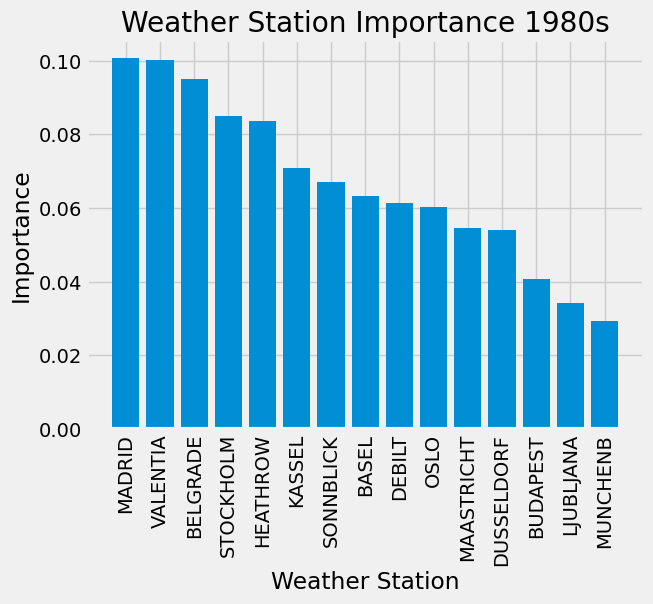

In [83]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 1980s')